# Test 0.2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from scipy.sparse import csr_matrix, hstack
from my_measures import BinaryClassificationPerformance
%matplotlib inline

# Read Raw Test Data

In [4]:
amazon = pd.read_csv('/Users/Eduardo/Desktop/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


# Features Creation <p>
Positivity, Negativity, Length

In [5]:
amazon['positivity'] = np.where(amazon['Score'] > 3,1,0)
amazon['negativity'] = np.where(amazon['Score'] < 3,1,0)
amazon['length'] = amazon['Text'].str.len()
amazon.head(1)

,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful,positivity,negativity,length
0,58438,123502,123503,B000VMBE8E,A17IQA4NDBK91W,maryinwilton,6,6,5,1199836800,Delicious Dark Chocolate Cookie,This is a excellent cookie. If you want somet...,1.0,True,1,0,244


# Quantitative Feature Selection <p>
In the trainning process, I was exploring many combinations of features. However, the following selection had the best performace.

In [6]:
X_quant_features_ed = amazon[["Score","positivity", "length"]]
print(X_quant_features_ed.head(5))
print(type(X_quant_features_ed))

   Score  positivity  length
0      5           1     244
1      5           1     384
2      2           0     526
3      5           1     318
4      5           1    1461
<class 'pandas.core.frame.DataFrame'>


# Featured Extraction. Hashing Trick. <p>
vectorizer = HashingVectorizer(n_features=2 ** 20, non_negative=True)



In [ ]:
# vectorizer = HashingVectorizer(n_features=2 ** 20, non_negative=True)
vectorizer = joblib.load('vectorizer.pkl')
vector = vectorizer.transform(amazon.Text)
print(vector.shape)
print(type(vector))

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


# Tfid Transformer <P>
According to the Scikit-learn documentation, one of the limitations of the Hashing Vectorizer is that it does not provide IDF weighting as that would introduce statefulness in the model. Thus, a TfidfTransformer can be appended to it in a pipeline if required. Let´s do that.

In [7]:
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(vector)
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


# All quantitative features combined as a Sparse Matrix

In [8]:
X_quant_features_csr = csr_matrix(X_quant_features_ed)
X_combined = hstack([X_tfidf, X_quant_features_csr])
# convert to sparse matrix
X_matrix = csr_matrix(X_combined) 
print(X_matrix.shape)

(91000, 1048579)


# Create X <P>
Scaled matrix of features

In [9]:
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(91000, 1048579)


# Create Y <P>
Vector of labels (helpful)

In [10]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


# Predict y  and Performance Results<P>
<b>Ridge Regression Classifier: </b> accuracy: 0.92402197802197805 <p>
ridge_1 = linear_model.RidgeClassifier(alpha=0.1)



In [16]:
ridge_1 = joblib.load('ridge_1.pkl')
ridge_performance_1 = BinaryClassificationPerformance(ridge_1.predict(X), y, 'ridge_1')
ridge_performance_1.compute_measures()
print(ridge_performance_1.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1065, 'TN': 83021, 'FP': 1345, 'FN': 5569, 'Accuracy': 0.924021978021978, 'Precision': 0.44190871369294604, 'Recall': 0.16053662948447392, 'desc': 'ridge_1'}


In [14]:
multilayer = joblib.load('multilayer.pkl')
multilayer_performance = BinaryClassificationPerformance(multilayer.predict(X), y, 'multilayer')
multilayer_performance.compute_measures()
print(multilayer_performance.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 2734, 'TN': 79381, 'FP': 4985, 'FN': 3900, 'Accuracy': 0.9023626373626373, 'Precision': 0.3541909573778987, 'Recall': 0.4121193849864335, 'desc': 'multilayer'}


In [18]:
forest = joblib.load('forest.pkl')
forest_performance = BinaryClassificationPerformance(forest.predict(X), y, 'forest')
forest_performance.compute_measures()
print(forest_performance.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1925, 'TN': 84321, 'FP': 45, 'FN': 4709, 'Accuracy': 0.9477582417582417, 'Precision': 0.9771573604060914, 'Recall': 0.29017184202592705, 'desc': 'forest'}


In [19]:
forest2 = joblib.load('forest2.pkl')
forest_performance2 = BinaryClassificationPerformance(forest2.predict(X), y, 'forest2')
forest_performance2.compute_measures()
print(forest_performance2.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1983, 'TN': 84314, 'FP': 52, 'FN': 4651, 'Accuracy': 0.9483186813186814, 'Precision': 0.9744471744471744, 'Recall': 0.29891468194151344, 'desc': 'forest2'}


In [26]:
logistic = joblib.load('logistic.pkl')
logistic_performance = BinaryClassificationPerformance(logistic.predict(X), y, 'logistic')
logistic_performance.compute_measures()
print(logistic_performance.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1731, 'TN': 79407, 'FP': 4959, 'FN': 4903, 'Accuracy': 0.8916263736263736, 'Precision': 0.2587443946188341, 'Recall': 0.26092854989448294, 'desc': 'logistic'}


In [28]:
logistic2 = joblib.load('logistic2.pkl')
logistic_performance2 = BinaryClassificationPerformance(logistic2.predict(X), y, 'logistic2')
logistic_performance2.compute_measures()
print(logistic_performance2.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1387, 'TN': 82032, 'FP': 2334, 'FN': 5247, 'Accuracy': 0.9166923076923077, 'Precision': 0.3727492609513572, 'Recall': 0.2090744648779017, 'desc': 'logistic2'}


In [31]:
prc = joblib.load('prc.pkl')
prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 6634, 'Neg': 84366, 'TP': 1766, 'TN': 79268, 'FP': 5098, 'FN': 4868, 'Accuracy': 0.8904835164835165, 'Precision': 0.2572843822843823, 'Recall': 0.26620440156768166, 'desc': 'prc'}


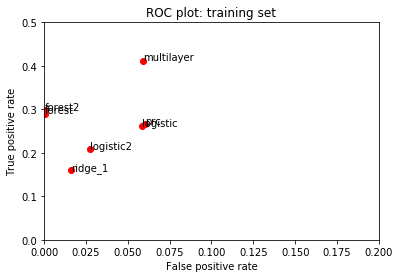

In [38]:
fits = [  ridge_performance_1, multilayer_performance, forest_performance, forest_performance2,logistic_performance,
       logistic_performance2,prc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 0.2, 0, 0.5])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Future Work <p>
In the second iteration, I would like to explore some different features that I have been creating. For example, <b>Readability</b> based on The Automated Readability Index (ARI), and <b>writing style features</b> such as the number of total punctuations, number of exclamation marks, average word length and average sentence length.
